In [11]:
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import utils

## Day 2: Dive

[#](https://adventofcode.com/2021/day/2) Now have strings of instructions telling the submarine to move up, down or forward. So lets figure out where the sub is after moving.

In [2]:
test: str = """forward 5
down 5
forward 8
up 3
down 8
forward 2"""

inp = utils.get_input(2, splitlines=False)

In [3]:
class Pilot(NamedTuple):
    direction: str
    move: int


def parse(inp=test, verbose=False):
    steps = []
    for line in inp.splitlines():
        x, y = line.split(" ")
        pilot = Pilot(x, int(y))

        steps.append(pilot)

    return steps


data = parse()
data

[Pilot(direction='forward', move=5),
 Pilot(direction='down', move=5),
 Pilot(direction='forward', move=8),
 Pilot(direction='up', move=3),
 Pilot(direction='down', move=8),
 Pilot(direction='forward', move=2)]

Back in the good old days, I would have witten this using if else statements or a dictionay, but with 3.10 we have [case pattern matching](https://www.python.org/dev/peps/pep-0636/).

In [8]:
def solve(inp=test, verbose:bool=False):
    data = parse(inp)
    
    depth = forward = 0
    
    for pilot in data:
        
        match pilot.direction:
            case "forward":
                forward += pilot.move
            case "down":
                depth += pilot.move
            case "up":
                depth -= pilot.move
            case _:
                raise ValueError(f"{pilot.direction=} unknown")
    
    print(f"{forward=} {depth=}")
    return depth * forward
    
assert solve(test) == 150 # example answer
solve(inp)

forward=15 depth=10
forward=2105 depth=807


1698735

## Part 2

Now we have a third variable called aim to track - up and down changes the aim and the sub now moves forward as before plus it moves in dept by aim * forward.

The input parsing remains the same so its just a slight modification.

In [12]:
class Submarine(NamedTuple):
    aim: int = 0
    x: int = 0
    y: int = 0


def solve_2(inp=test, verbose: bool = False):
    data = parse(inp)

    aim = depth = forward = 0  # the three vars to track
    positions = []

    for pilot in data:
        if pilot.direction == "forward":
            forward += pilot.move
            depth += pilot.move * aim
        elif pilot.direction == "down":
            aim += pilot.move
        elif pilot.direction == "up":
            aim -= pilot.move
        else:
            print(f"{pilot.direction=} unkonwn")

        positions.append((aim, forward, depth))

    ans = depth * forward
    print(f"{forward=} {depth=} {ans=:,}")
    return positions


_ = solve_2(test) == 900  # example answer
positions = solve_2(inp)

forward=15 depth=60 ans=900
forward=2105 depth=757618 ans=1,594,785,890


A simple plot:

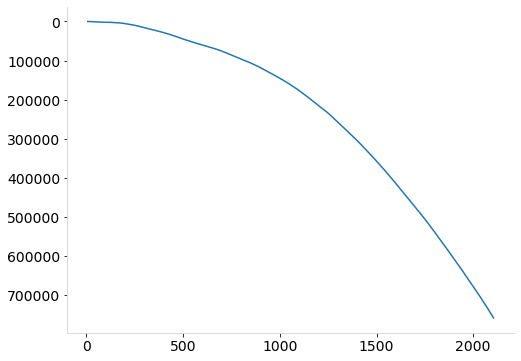

In [14]:
aim, x, y = zip(*positions)

plt.style.use("advent.mplstyle")

plt.plot(x, y)
plt.gca().invert_yaxis();